In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
groq_api_key = os.getenv("GROQ_API_KEY")
langsmith = os.getenv("LANGSMITH_API_KEY")

In [4]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANCHAIN_ENDPOINT"] = "https://api.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_PROJECT"] = "LANGGRAPH"

In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(api_key=groq_api_key, model= "llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000022A3D9D9400>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000022A3D61CB60>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
llm.invoke("Hello, world!")

AIMessage(content='Hello, world. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 39, 'total_tokens': 51, 'completion_time': 0.018734605, 'prompt_time': 0.001766204, 'queue_time': 0.053193526, 'total_time': 0.020500809}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--64ed1da3-a945-4a3f-a2fe-cf47c90ad65d-0', usage_metadata={'input_tokens': 39, 'output_tokens': 12, 'total_tokens': 51})

## Building Chatbot using LangGraph

In [9]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

graph_builder = StateGraph(State)
graph_builder

In [12]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}


In [13]:
graph_builder.add_node("chatbot",chatbot)

In [14]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [15]:
graph = graph_builder.compile()

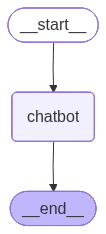

In [16]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    raise e

In [17]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Sayonara!")
        break

    for event in graph.stream({"messages":("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("Assistant: ", value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 36, 'total_tokens': 54, 'completion_time': 0.020712117, 'prompt_time': 0.001551321, 'queue_time': 0.047809689, 'total_time': 0.022263438}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b786fa07-c5c8-46cc-8bf3-5ebfbc7eb905-0', usage_metadata={'input_tokens': 36, 'output_tokens': 18, 'total_tokens': 54})}])
content='Hello. Is there something I can help you with or would you like to chat?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 36, 'total_tokens': 54, 'completion_time': 0.020712117, 'prompt_time': 0.001551321, 'queue_time': 0.047809689, 'total_time': 0.022263438}, 'model_name': 'llama-3.1-8b-instant', 'sy